# PyTorch Learning
KurwAI | Cheslaff | 🎄<br>
<img src="https://images.emojiterra.com/google/noto-emoji/unicode-16.0/color/1024px/1f9ab.png" width=5%>
<img src="https://em-content.zobj.net/source/apple/391/red-heart_2764-fe0f.png" width=5%>
<img src="https://static-00.iconduck.com/assets.00/pytorch-icon-1694x2048-jgwjy3ne.png" width=5%>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch import nn

torch.__version__

'2.5.1+cu121'

In [18]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [52]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X, y = np.array(df_train.drop(columns="label")), np.array(df_train["label"])
X = X / 255.
X_test, y_test = np.array(df_test.drop(columns="label")), np.array(df_test["label"])
X_test = X_test / 255.

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1, random_state=42)

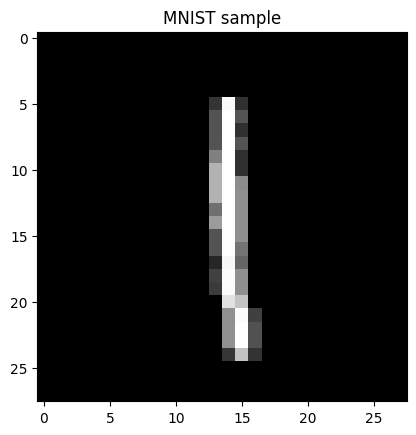

In [86]:
plt.title("MNIST sample")
plt.imshow(X_train[0].reshape(28, 28), cmap="grey");

Nothing to explore in data :(

In [87]:
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

X_dev = torch.from_numpy(X_dev).type(torch.float)
y_dev = torch.from_numpy(y_dev).type(torch.LongTensor)

X_test = torch.from_numpy(X_test).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [88]:
(X_train.shape, y_train.shape), (X_dev.shape, y_dev.shape), (X_test.shape, y_test.shape)

((torch.Size([54000, 784]), torch.Size([54000])),
 (torch.Size([6000, 784]), torch.Size([6000])),
 (torch.Size([10000, 784]), torch.Size([10000])))

In [118]:
model = nn.Sequential(
    nn.Linear(in_features=784, out_features=28),
    nn.ReLU(),
    nn.Linear(in_features=28, out_features=28),
    nn.ReLU(),
    nn.Linear(in_features=28, out_features=10)
).to(device)
model

Sequential(
  (0): Linear(in_features=784, out_features=28, bias=True)
  (1): ReLU()
  (2): Linear(in_features=28, out_features=28, bias=True)
  (3): ReLU()
  (4): Linear(in_features=28, out_features=10, bias=True)
)

In [119]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [120]:
def accuracy_fn(y_true, y_pred):
  return 1 / len(y_true) * torch.eq(y_true, y_pred).sum().item()

In [121]:
torch.manual_seed(23)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_dev = X_dev.to(device)
y_dev = y_dev.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 2_300

for epoch in range(epochs):
  model.train()

  logs_pred = model(X_train)
  y_pred = torch.softmax(logs_pred, dim=1).argmax(dim=1)

  loss = loss_fn(logs_pred, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    logs_dev_pred = model(X_dev)
    y_dev_pred = torch.softmax(logs_dev_pred, dim=1).argmax(dim=1)

    dev_loss = loss_fn(logs_dev_pred, y_dev)
    dev_acc = accuracy_fn(y_dev, y_dev_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.3f} | Train Acc: {acc:.3f} | Dev Loss: {dev_loss:.3f} | Dev Acc: {dev_acc:.3f}")

Epoch: 0 | Train Loss: 2.311 | Train Acc: 0.096 | Dev Loss: 2.310 | Dev Acc: 0.099
Epoch: 100 | Train Loss: 2.275 | Train Acc: 0.231 | Dev Loss: 2.275 | Dev Acc: 0.238
Epoch: 200 | Train Loss: 2.228 | Train Acc: 0.268 | Dev Loss: 2.227 | Dev Acc: 0.272
Epoch: 300 | Train Loss: 2.153 | Train Acc: 0.287 | Dev Loss: 2.151 | Dev Acc: 0.290
Epoch: 400 | Train Loss: 2.030 | Train Acc: 0.305 | Dev Loss: 2.027 | Dev Acc: 0.309
Epoch: 500 | Train Loss: 1.856 | Train Acc: 0.371 | Dev Loss: 1.852 | Dev Acc: 0.372
Epoch: 600 | Train Loss: 1.653 | Train Acc: 0.543 | Dev Loss: 1.648 | Dev Acc: 0.541
Epoch: 700 | Train Loss: 1.433 | Train Acc: 0.668 | Dev Loss: 1.429 | Dev Acc: 0.664
Epoch: 800 | Train Loss: 1.212 | Train Acc: 0.723 | Dev Loss: 1.210 | Dev Acc: 0.723
Epoch: 900 | Train Loss: 1.029 | Train Acc: 0.746 | Dev Loss: 1.029 | Dev Acc: 0.749
Epoch: 1000 | Train Loss: 0.897 | Train Acc: 0.765 | Dev Loss: 0.898 | Dev Acc: 0.767
Epoch: 1100 | Train Loss: 0.803 | Train Acc: 0.783 | Dev Loss: 0.8

In [122]:
model.eval()

with torch.inference_mode():
  test_pred = model(X_test)

test_pred = test_pred.argmax(dim=1)
test_pred[:5]

tensor([7, 2, 1, 0, 4], device='cuda:0')

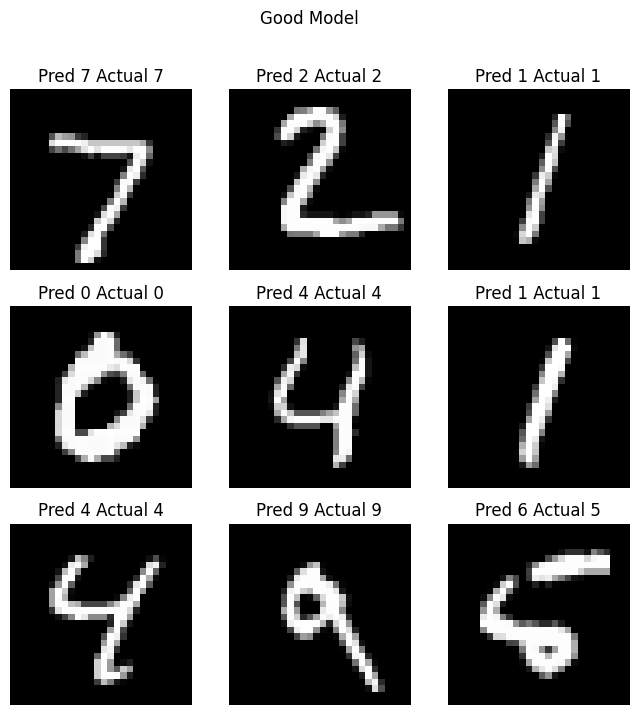

In [123]:
# Matplotlib doesn't support gpu
X_test = X_test.to("cpu")
y_test = y_test.to("cpu")

plt.figure(figsize=(8, 8))
plt.suptitle("Good Model")
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.axis("off")
  plt.title(f"Pred {test_pred[i]} Actual {y_test[i]}")
  plt.imshow(X_test[i].reshape((28, 28)), cmap="grey");

**PyTorch Dummy Path 2024-2025**<br>
<img src="https://images.emojiterra.com/google/noto-emoji/unicode-16.0/color/1024px/1f9ab.png" width=5%>
<img src="https://em-content.zobj.net/source/apple/391/red-heart_2764-fe0f.png" width=5%>
<img src="https://static-00.iconduck.com/assets.00/pytorch-icon-1694x2048-jgwjy3ne.png" width=5%><br>
MIT License, no doubt